In [883]:
import numpy as np
import pandas as pd
import os
import librosa, librosa.display
import soundfile as sf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import seaborn as sns
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, find_peaks
import glob

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import normalize

Details:
- Sample rate: 16000 Hz.
- Data type: 16-bit PCM (int16).
- File size: Each example has a file size of 128 kB (5.53 GB for complete dataset).
- Duration: 4 seconds.
- Sound: Piano (digital).
- Chords were played by a human on a velocity-sensitive piano keyboard.
- 3 seconds pressed, 1 second released.

- 3 octaves (2,3,4).
- 12 base notes per octave: Cn, Df, Dn, Ef, En, Fn, Gf, Gn, Af, An, Bf, Bn. (n is natural, f is flat).
- 4 triad types per note: major (j), minor (n), diminished (d), augmented (a). No inversions.
- 3 volumes per triad: forte (f), metsoforte (m), piano (p).

## Obtain all the chord file names as a list

In [96]:
import os

# folder path
dir_path = r'./audio_augmented_x10'

# list to store files
chord_files = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        chord_files.append(path)

In [97]:
print(chord_files[:10])

['piano_3_Af_a_m_45.wav', 'piano_4_Gn_j_f_13.wav', 'piano_2_Fn_d_m_63.wav', 'piano_2_Df_a_f_47.wav', 'piano_4_Fn_a_p_91.wav', 'piano_3_Cn_d_f_61.wav', 'piano_4_En_j_m_07.wav', 'piano_2_Dn_d_f_77.wav', 'piano_2_An_n_f_59.wav', 'piano_3_An_d_m_75.wav']


In [893]:
audio_data_files = glob.glob('./chords_clean/**/*.wav', recursive=True)

In [894]:
len(audio_data_files)

129074

Test of splitting file name into data:

In [895]:
path = audio_data_files[0]
path_parts = path[:-4].split('/')
path_parts

['.', 'chords_clean', 'Gn_minor', 'piano_4_Gn_n_m_81_2']

## Import Cleaned Audio File

Cleaned means:
- audio files shortened to 1 second
- audio files without dead space 

In [932]:
file_type = 'clean'

In [933]:
file_paths = []
file_name = []
sound = []
octave = []
triad_type = []
volume = []
chord_idx = []
base_note_name = []

for path in audio_data_files:
    path_parts = path[:-4].split('/')
    file = path_parts[len(path_parts)-1]
    
    name_data = file[:-4].split('_')
    
    file_paths.append(path)
    file_name.append(file)
    sound.append(name_data[0])
    octave.append(name_data[1])
    triad_type.append(name_data[3])
    volume.append(name_data[4])
    chord_idx.append(name_data[5])
    base_note_name.append(name_data[2])

In [934]:
df = pd.DataFrame(list(zip(file_paths,
                           file_name, 
                            sound,
                            octave,
                            triad_type,
                            volume,
                            chord_idx,
                            base_note_name)),
               columns=['file_path', 'file_name', 'sound', 'octave', 'triad_type', 'volume', 'chord_idx', 'base_note_name'])

In [935]:
df.head()

file_path            file_name  \
0  ./chords_clean/Gn_minor/piano_4_Gn_n_m_81_2.wav  piano_4_Gn_n_m_81_2   
1  ./chords_clean/Gn_minor/piano_3_Gn_n_m_47_0.wav  piano_3_Gn_n_m_47_0   
2  ./chords_clean/Gn_minor/piano_3_Gn_n_m_02_0.wav  piano_3_Gn_n_m_02_0   
3  ./chords_clean/Gn_minor/piano_2_Gn_n_p_28_0.wav  piano_2_Gn_n_p_28_0   
4  ./chords_clean/Gn_minor/piano_3_Gn_n_f_19_0.wav  piano_3_Gn_n_f_19_0   

   sound octave triad_type volume chord_idx base_note_name  
0  piano      4          n      m                       Gn  
1  piano      3          n      m                       Gn  
2  piano      3          n      m                       Gn  
3  piano      2          n      p                       Gn  
4  piano      3          n      f                       Gn

In [941]:
df2 = df[df['file_path'].str.endswith('0.wav')]

In [942]:
df2.shape

(43200, 8)

## Uncleaned Audio File Import

In [925]:
name = 'piano_2_Af_a_f_00.wav'
name_data = name[:-4].split('_')
name_data

['piano', '2', 'Af', 'a', 'f', '00']

In [926]:
file_name = []
sound = []
octave = []
triad_type = []
volume = []
chord_idx = []
base_note_name = []

for file in chord_files:
    name_data = file[:-4].split('_')
    
    file_name.append(file)
    sound.append(name_data[0])
    octave.append(name_data[1])
    triad_type.append(name_data[3])
    volume.append(name_data[4])
    chord_idx.append(name_data[5])
    base_note_name.append(name_data[2])

In [927]:
df = pd.DataFrame(list(zip(file_name, 
                      sound,
                      octave,
                      triad_type,
                      volume,
                      chord_idx,
                      base_note_name)),
               columns=['file_name', 'sound', 'octave', 'triad_type', 'volume', 'chord_idx', 'base_note_name'])

In [928]:
df.head()

file_name  sound octave triad_type volume chord_idx  \
0  piano_3_Af_a_m_45.wav  piano      3          a      m        45   
1  piano_4_Gn_j_f_13.wav  piano      4          j      f        13   
2  piano_2_Fn_d_m_63.wav  piano      2          d      m        63   
3  piano_2_Df_a_f_47.wav  piano      2          a      f        47   
4  piano_4_Fn_a_p_91.wav  piano      4          a      p        91   

  base_note_name  
0             Af  
1             Gn  
2             Fn  
3             Df  
4             Fn

In [929]:
df.shape

(43200, 7)

In [900]:
# Applying the condition
df['triad_type'].mask(df['triad_type'] == 'j', 'major', inplace=True)
df['triad_type'].mask(df['triad_type'] == 'n', 'minor', inplace=True)
df['triad_type'].mask(df['triad_type'] == 'd', 'dim', inplace=True)
df['triad_type'].mask(df['triad_type'] == 'a', 'aug', inplace=True)

df['volume'].mask(df['volume'] == 'f', 'forte', inplace=True)
df['volume'].mask(df['volume'] == 'm', 'mezzoforte', inplace=True)
df['volume'].mask(df['volume'] == 'p', 'piano', inplace=True)

In [901]:
df.head(10)

file_path            file_name  \
0  ./chords_clean/Gn_minor/piano_4_Gn_n_m_81_2.wav  piano_4_Gn_n_m_81_2   
1  ./chords_clean/Gn_minor/piano_3_Gn_n_m_47_0.wav  piano_3_Gn_n_m_47_0   
2  ./chords_clean/Gn_minor/piano_3_Gn_n_m_02_0.wav  piano_3_Gn_n_m_02_0   
3  ./chords_clean/Gn_minor/piano_2_Gn_n_p_28_0.wav  piano_2_Gn_n_p_28_0   
4  ./chords_clean/Gn_minor/piano_3_Gn_n_f_19_0.wav  piano_3_Gn_n_f_19_0   
5  ./chords_clean/Gn_minor/piano_4_Gn_n_p_48_0.wav  piano_4_Gn_n_p_48_0   
6  ./chords_clean/Gn_minor/piano_2_Gn_n_m_82_1.wav  piano_2_Gn_n_m_82_1   
7  ./chords_clean/Gn_minor/piano_2_Gn_n_f_99_1.wav  piano_2_Gn_n_f_99_1   
8  ./chords_clean/Gn_minor/piano_2_Gn_n_f_21_1.wav  piano_2_Gn_n_f_21_1   
9  ./chords_clean/Gn_minor/piano_3_Gn_n_p_10_1.wav  piano_3_Gn_n_p_10_1   

   sound octave triad_type      volume chord_idx base_note_name  
0  piano      4      minor  mezzoforte                       Gn  
1  piano      3      minor  mezzoforte                       Gn  
2  piano      3      minor  mezzoforte                       Gn  
3  piano      2      minor       piano                       Gn  
4  piano      3      minor       forte                       Gn  
5  piano      4      minor       piano                       Gn  
6  piano      2      minor  mezzoforte                       Gn  
7  piano      2      minor       forte                       Gn  
8  piano      2      minor       forte                       Gn  
9  piano      3      minor       piano                       Gn

## Chord Data EDA

Look at the count of each chord within the dataset 

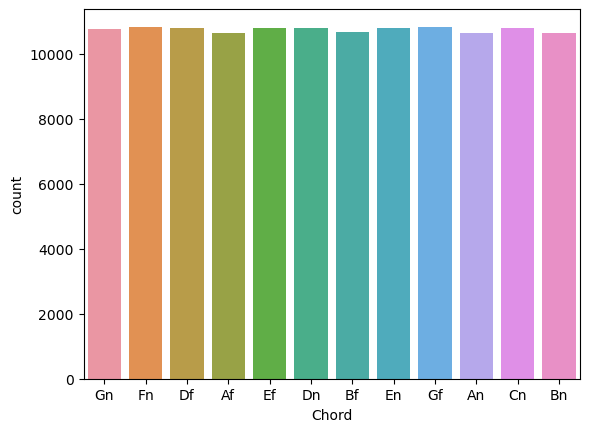

In [943]:
sns.countplot(x=df['base_note_name'])
plt.xlabel('Chord')
plt.savefig('Chord Distribution.png')

The datasets between the each base notes is very evenly distributed. This is because the dataset was generated with evenness in mind.

In [1157]:
if file_type == 'clean':
    chord_file = df['file_path'][0]
else:
    chord_file = dir_path + "/" + df['file_name'][16]

In [1158]:
# load the audio file and show raw data and sample rate
y, sr = librosa.load(chord_file)
print("Y is a numpy array:", y)
print("Shape of Y:", y.shape)
print("Sample Rate:", sr)

Y is a numpy array: [-0.006433   -0.00211971  0.00589119 ... -0.00925536 -0.01127478
 -0.00738383]
Shape of Y: (22050,)
Sample Rate: 22050


In [1159]:
# Play the first Audio file
ipd.Audio(chord_file)

In [1160]:
print(chord_file)

./chords_clean/Gn_minor/piano_4_Gn_n_m_81_2.wav


Text(0.5, 0, 'Time')

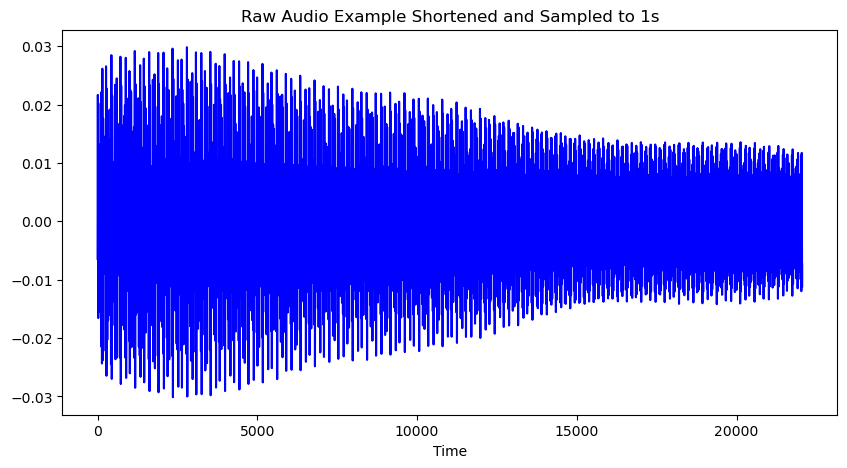

In [1164]:
# turn raw data array to pd series and plot the audio example
pd.Series(y).plot(figsize=(10,5), title="Raw Audio Example Shortened and Sampled to 1s", color='blue');
plt.xlabel('Time')

piano_4_Gn_n_m_81_2


Text(0.5, 0, 'Time [0.0000625 timestep]')

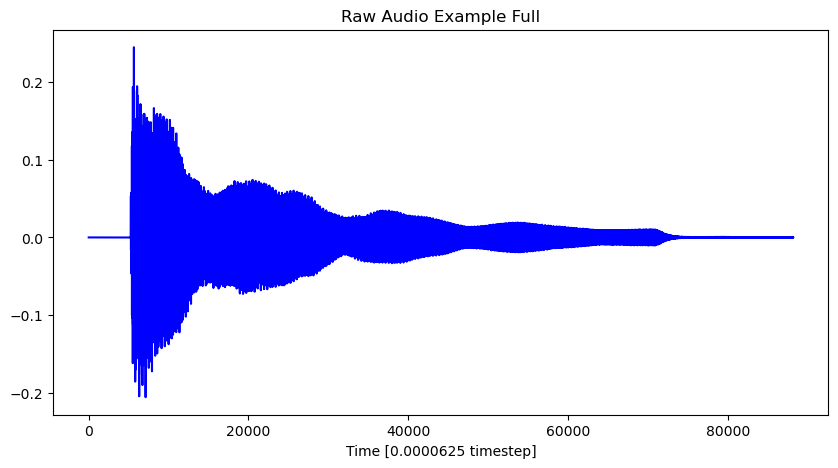

In [1194]:
chord_file = './audio_augmented_x10/piano_4_An_n_m_02.wav'
y, sr = librosa.load(chord_file)
pd.Series(y).plot(figsize=(10,5), title="Raw Audio Example Full", color='blue');
print(df['file_name'][0])

# time step is 1/f which in our case is 1/16000 [Hz] = 0.0000625 [s]
plt.xlabel('Time [0.0000625 timestep]')

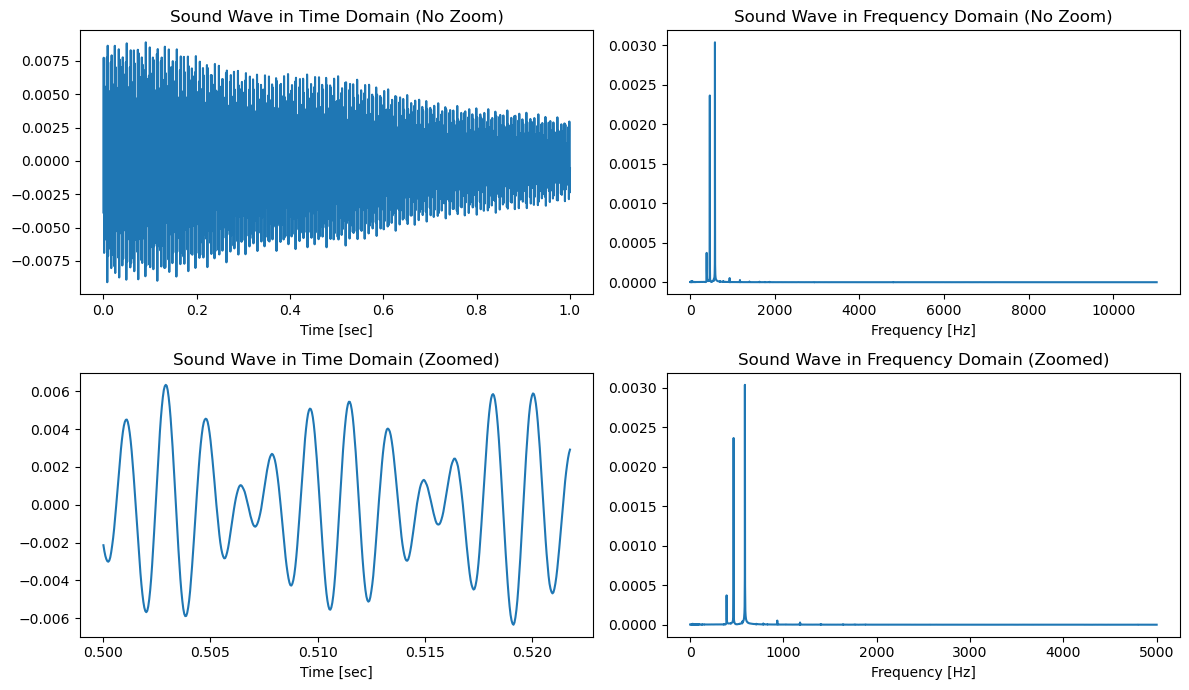

In [948]:
# fs, signal = wavfile.read(dir_path + "/" + df['file_name'][0])
signal, fs = librosa.load(chord_file)
N = len(signal)
time = np.linspace(0., N/fs, N)

# Fourier Transform
y_freq = fftfreq(N, 1/fs)[:N//2]  # array for frequency stamps
signal_f = fft(signal) # Signal in frequency domain
signal_f_onesided = 2.0/N * np.abs(signal_f[0:N//2]) # taking positive terms

# Plotting signal in time and frequency domains
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
axes[0,0].plot(time, signal)
axes[0,0].set_title("Sound Wave in Time Domain (No Zoom)")
axes[0,0].set(xlabel='Time [sec]')
axes[0,1].plot(y_freq, signal_f_onesided)
axes[0,1].set_title("Sound Wave in Frequency Domain (No Zoom)")
axes[0,1].set(xlabel='Frequency [Hz]')
axes[1,0].plot(time[(N//2):(N//2+480)], signal[(N//2):(N//2+480)])
axes[1,0].set_title("Sound Wave in Time Domain (Zoomed)")
axes[1,0].set(xlabel='Time [sec]')
axes[1,1].plot(y_freq[:5000], signal_f_onesided[:5000])
axes[1,1].set_title("Sound Wave in Frequency Domain (Zoomed)")
axes[1,1].set(xlabel='Frequency [Hz]')
fig.tight_layout()
plt.show()

In [949]:
# Use STFT on raw audio data
D = librosa.stft(signal)
# convert from aplitude to decibel values by taking the absolute value of D in reference what the max value would be
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# see the shape of transformed data
print("New shape of transformed data", S_db.shape)

New shape of transformed data (1025, 44)


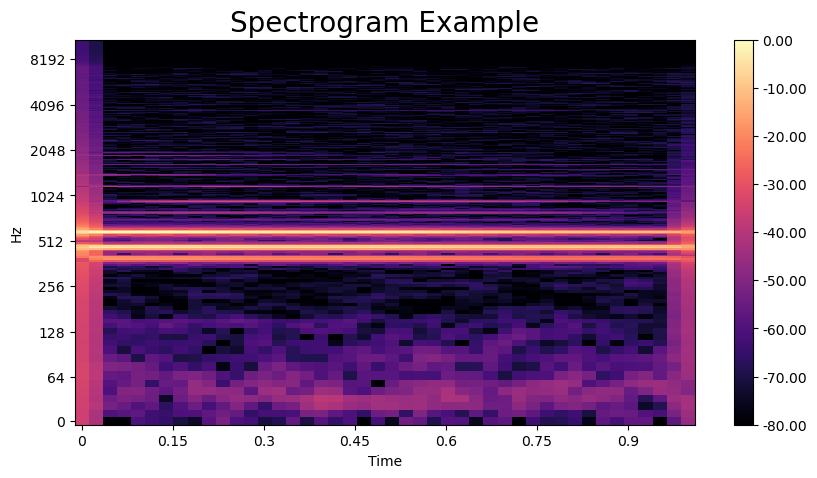

In [1168]:
# plot transformed data as spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

In [1169]:
# apply mel spectogram without STFT
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128*2)
print("Shape of Mel Spectogram", S.shape)
# use that converting function as above
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

Shape of Mel Spectogram (256, 173)


## Mel Spectrogram

A mel spectrogram is a spectrogram in which the frequency axis is represented in units of mel, which is a non-linear scale of frequency that is closer to how humans perceive sound. Mel spectrograms are commonly used in speech and music processing, as they can provide more information that is relevant to human perception.

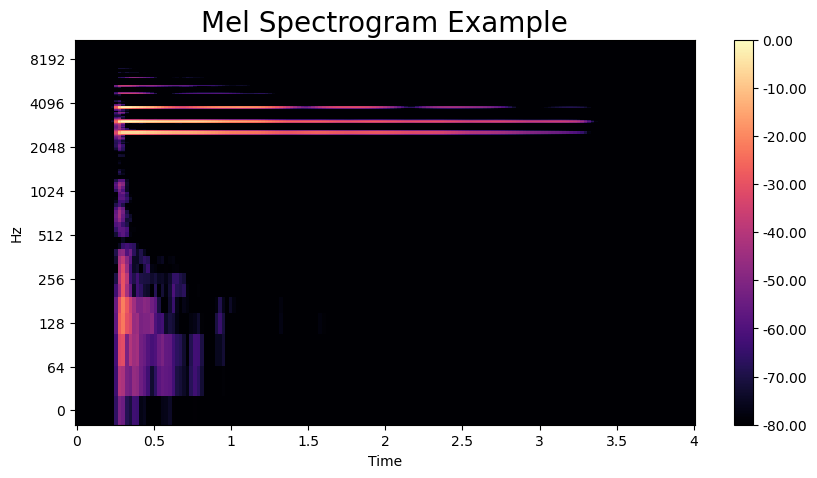

In [1171]:
# plot the mel spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

## Chromagram

- A chromagram is a type of visual representation of musical data in which the vertical axis represents different musical pitches, and the horizontal axis represents time. 

- Each pitch is represented by a specific color, and the intensity of the color corresponds to the strength or amplitude of that pitch in the music at a given time. 

- Chromagrams can be used to analyze and study the harmonic structure of a piece of music.

- Assuming the equal-tempered scale, one considers twelve chroma values represented by the set
{C, C♯, D, D♯, E , F, F♯, G, G♯, A, A♯, B}

- Enumerating the chroma values, one can identify the set of chroma values with the set of integers {1,2,...,12}, where 1 refers to chroma C, 2 to C♯, and so on.

In [953]:
S = np.abs(librosa.stft(signal))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)

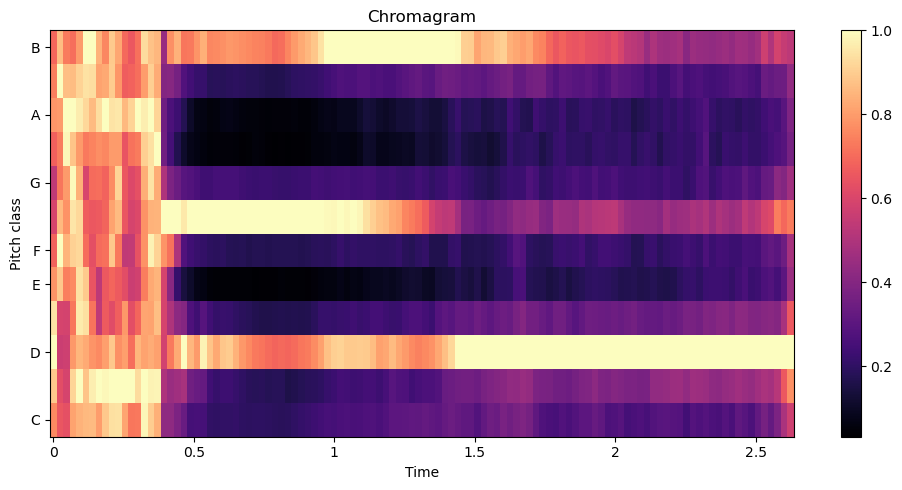

In [1195]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [955]:
chroma_avg = np.average(chroma, axis=1)

In [956]:
chroma_avg

array([0.03078148, 0.2401208 , 0.996146  , 0.24021493, 0.0293121 ,
       0.02738016, 0.05654227, 0.13196672, 0.0569238 , 0.21222936,
       0.7193248 , 0.18883921], dtype=float32)

In [957]:
chroma_cols = ['chroma_C', 
               'chroma_C#', 
               'chroma_D', 
               'chroma_D#', 
               'chroma_E', 
               'chroma_F',
               'chroma_F#',
               'chroma_G',
               'chroma_G#',
               'chroma_A',
               'chroma_A#',
               'chroma_B']

df_chroma = pd.DataFrame([np.average(chroma, axis=1)], columns=chroma_cols)

In [1173]:
# currently for 1 example file, will get chroma for each audio file next 
df_chroma

chroma_C  chroma_C#  chroma_D  chroma_D#  chroma_E  chroma_F  chroma_F#  \
0  0.931724   0.774541  0.672795    0.70271   0.77877  0.579608    0.55304   

   chroma_G  chroma_G#  chroma_A  chroma_A#  chroma_B  
0  0.709505   0.661061  0.603272   0.610947  0.742109

Create Chromagram for each Audio File and save it to a pandas DataFrame

In [1172]:
df.head()

file_path            file_name  \
0  ./chords_clean/Gn_minor/piano_4_Gn_n_m_81_2.wav  piano_4_Gn_n_m_81_2   
1  ./chords_clean/Gn_minor/piano_3_Gn_n_m_47_0.wav  piano_3_Gn_n_m_47_0   
2  ./chords_clean/Gn_minor/piano_3_Gn_n_m_02_0.wav  piano_3_Gn_n_m_02_0   
3  ./chords_clean/Gn_minor/piano_2_Gn_n_p_28_0.wav  piano_2_Gn_n_p_28_0   
4  ./chords_clean/Gn_minor/piano_3_Gn_n_f_19_0.wav  piano_3_Gn_n_f_19_0   

   sound octave triad_type volume chord_idx base_note_name  
0  piano      4          n      m                       Gn  
1  piano      3          n      m                       Gn  
2  piano      3          n      m                       Gn  
3  piano      2          n      p                       Gn  
4  piano      3          n      f                       Gn

In [959]:
# generate the chroma for each audio file
chroma_all = []

if file_type == 'clean':
    for index, chord_file in df['file_path'].items():
        signal, fs = librosa.load(chord_file)

        # generate the chroma
        S = np.abs(librosa.stft(signal))
        chroma = librosa.feature.chroma_stft(S=S, sr=sr)

        chroma_avg = np.average(chroma, axis=1)
        chroma_all.append(chroma_avg)

else:
    for index, chord_file in df['file_name'].items():
        file_path = dir_path + "/" + chord_file

        signal, fs = librosa.load(file_path)

        # generate the chroma
        S = np.abs(librosa.stft(signal))
        chroma = librosa.feature.chroma_stft(S=S, sr=sr)

        chroma_avg = np.average(chroma, axis=1)
        # chroma_all = np.append(chroma_all, [chroma_avg], axis=0)
        chroma_all.append(chroma_avg)

df_chroma = pd.DataFrame(chroma_all, columns=chroma_cols)

In [960]:
df_chroma.shape

(129074, 12)

In [961]:
df_feat = pd.concat([df, df_chroma], axis=1)

In [962]:
df_feat.head()

file_path            file_name  \
0  ./chords_clean/Gn_minor/piano_4_Gn_n_m_81_2.wav  piano_4_Gn_n_m_81_2   
1  ./chords_clean/Gn_minor/piano_3_Gn_n_m_47_0.wav  piano_3_Gn_n_m_47_0   
2  ./chords_clean/Gn_minor/piano_3_Gn_n_m_02_0.wav  piano_3_Gn_n_m_02_0   
3  ./chords_clean/Gn_minor/piano_2_Gn_n_p_28_0.wav  piano_2_Gn_n_p_28_0   
4  ./chords_clean/Gn_minor/piano_3_Gn_n_f_19_0.wav  piano_3_Gn_n_f_19_0   

   sound octave triad_type volume chord_idx base_note_name  chroma_C  \
0  piano      4          n      m                       Gn  0.021086   
1  piano      3          n      m                       Gn  0.058108   
2  piano      3          n      m                       Gn  0.075322   
3  piano      2          n      p                       Gn  0.110490   
4  piano      3          n      f                       Gn  0.100534   

   chroma_C#  chroma_D  chroma_D#  chroma_E  chroma_F  chroma_F#  chroma_G  \
0   0.062740  0.305575   0.060142  0.015906  0.019102   0.139394  0.655064   
1   0.221703  0.970053   0.275296  0.072009  0.251658   0.161764  0.331447   
2   0.264430  0.981119   0.260881  0.100008  0.243168   0.190650  0.388795   
3   0.283365  0.854992   0.335241  0.078169  0.185812   0.155374  0.248466   
4   0.242906  0.965388   0.322875  0.129069  0.307325   0.210705  0.365852   

   chroma_G#  chroma_A  chroma_A#  chroma_B  
0   0.130309  0.189847   1.000000  0.195531  
1   0.137081  0.257800   0.889964  0.290810  
2   0.157322  0.289718   0.848894  0.261515  
3   0.165908  0.431810   0.995923  0.427786  
4   0.192919  0.286078   0.886684  0.373673

## Mel-Frequency Cepstral Coefficients (MFCC)

In [963]:
# specifying range of MFCCs to extract from audio file
n_mfcc = 40

# create column names based on number of MFCC
mfcc_cols = ["mfcc_" + str(i) for i in range(n_mfcc)]

In [966]:
# open all audio data files and extract MFCCs
mfcc_all = []

if file_type == 'clean':
    for index, chord_file in df['file_path'].items():
        y, sr = librosa.load(chord_file)

        # generate the MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # mfcc = librosa.amplitude_to_db(mfcc, ref=np.max)
        mfcc_avg = np.average(mfcc, axis=1)
        mfcc_all.append(np.array(mfcc_avg))

else:
    for index, chord_file in df['file_name'].items():
        file_path = dir_path + "/" + chord_file

        y, sr = librosa.load(file_path)

        # generate the MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # mfcc = librosa.amplitude_to_db(mfcc, ref=np.max)
        mfcc_avg = np.average(mfcc, axis=1)
        mfcc_all.append(np.array(mfcc_avg))
    
df_mfcc = pd.DataFrame(np.array(mfcc_all), columns=mfcc_cols)

In [967]:
df_mfcc

mfcc_0      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0      -713.370667  100.833771 -21.314276 -50.184433 -46.917152   0.476983   
1      -440.779388  163.763580 -38.377552 -10.035438   0.254902 -22.520941   
2      -477.044952  166.792664 -31.417692 -12.347205   1.290825 -17.798340   
3      -615.521606  215.051224  46.927170   7.569000  16.664244  -0.365673   
4      -288.743134  145.437622 -70.283478   8.728217 -10.544882 -15.759177   
...            ...         ...        ...        ...        ...        ...   
129069 -279.096161  124.286865 -72.891708  18.482634 -17.983927 -11.370126   
129070 -695.342102   83.911140 -40.553539 -43.521511 -11.492293  44.947533   
129071 -620.440674  198.244278  12.849807   5.476669   4.253967 -14.675384   
129072 -278.211121  122.264290 -82.393738  25.053123 -28.774803 -21.626812   
129073 -600.922363  207.690247  15.124447   1.664244   3.660193 -20.852356   

           mfcc_6     mfcc_7     mfcc_8     mfcc_9  ...    mfcc_30    mfcc_31  \
0       43.346539  63.805119  45.439507  21.045912  ...  -5.271365 -35.312714   
1      -26.955339 -32.031841 -12.755747  10.149570  ...   9.909188 -35.432358   
2      -22.773830 -30.468203 -14.567780   7.034418  ...   7.302012 -34.526432   
3      -25.278669 -16.547924  -1.843403  -8.312759  ...  37.208862   8.043143   
4      -20.390450 -23.054817 -10.850118   4.032208  ...   3.423187 -33.654514   
...           ...        ...        ...        ...  ...        ...        ...   
129069 -19.068745  -0.810949  23.033308  20.084116  ...   0.801713 -46.321564   
129070  69.332718  36.986946   3.344324 -11.104415  ... -10.319386 -46.531845   
129071 -15.866916  -2.088619 -21.261427 -35.509312  ...   9.327981 -27.041298   
129072 -16.423920  -0.193707  20.566397  13.084256  ...  -5.779066 -54.243404   
129073 -16.068619  -1.426690 -19.730314 -32.828850  ...  10.523759 -27.235929   

          mfcc_32    mfcc_33    mfcc_34    mfcc_35    mfcc_36    mfcc_37  \
0      -24.695070   6.538298  20.906237  23.050064  19.309752   4.416486   
1      -11.705332  30.663696  18.594995  16.658636  36.645432   1.628656   
2      -12.856427  29.348047  22.152620  18.214745  35.632286   2.465696   
3      -16.217188  -9.559354  17.134462  29.698212  10.742682 -17.767744   
4       -2.228154  30.850410  16.937263  12.650962  38.595909   3.702611   
...           ...        ...        ...        ...        ...        ...   
129069 -18.515471  13.660783   3.815827  22.411919  15.001163 -31.197386   
129070 -11.254742  21.801184  24.422869  26.303362  -2.075405 -32.348446   
129071 -37.633244  -7.897458  19.027729   9.222253 -12.629028  -3.361988   
129072 -15.433719  10.663919   2.038466  28.576141  11.453652 -34.804832   
129073 -40.897480  -9.488172  20.619118   9.350741 -13.168633  -4.434166   

          mfcc_38    mfcc_39  
0      -19.930189 -27.757179  
1      -48.682796 -31.272369  
2      -48.743973 -32.636776  
3      -19.438128   0.714130  
4      -45.797367 -24.831341  
...           ...        ...  
129069  -2.127228  17.965242  
129070 -16.900560  14.864216  
129071  17.865416   7.081467  
129072  -3.845451  16.796074  
129073  18.843996   7.819872  

[129074 rows x 40 columns]

In [968]:
df_feat = pd.concat([df_feat, df_mfcc], axis=1)

In [969]:
df_feat.head()

file_path            file_name  \
0  ./chords_clean/Gn_minor/piano_4_Gn_n_m_81_2.wav  piano_4_Gn_n_m_81_2   
1  ./chords_clean/Gn_minor/piano_3_Gn_n_m_47_0.wav  piano_3_Gn_n_m_47_0   
2  ./chords_clean/Gn_minor/piano_3_Gn_n_m_02_0.wav  piano_3_Gn_n_m_02_0   
3  ./chords_clean/Gn_minor/piano_2_Gn_n_p_28_0.wav  piano_2_Gn_n_p_28_0   
4  ./chords_clean/Gn_minor/piano_3_Gn_n_f_19_0.wav  piano_3_Gn_n_f_19_0   

   sound octave triad_type volume chord_idx base_note_name  chroma_C  \
0  piano      4          n      m                       Gn  0.021086   
1  piano      3          n      m                       Gn  0.058108   
2  piano      3          n      m                       Gn  0.075322   
3  piano      2          n      p                       Gn  0.110490   
4  piano      3          n      f                       Gn  0.100534   

   chroma_C#  ...    mfcc_30    mfcc_31    mfcc_32    mfcc_33    mfcc_34  \
0   0.062740  ...  -5.271365 -35.312714 -24.695070   6.538298  20.906237   
1   0.221703  ...   9.909188 -35.432358 -11.705332  30.663696  18.594995   
2   0.264430  ...   7.302012 -34.526432 -12.856427  29.348047  22.152620   
3   0.283365  ...  37.208862   8.043143 -16.217188  -9.559354  17.134462   
4   0.242906  ...   3.423187 -33.654514  -2.228154  30.850410  16.937263   

     mfcc_35    mfcc_36    mfcc_37    mfcc_38    mfcc_39  
0  23.050064  19.309752   4.416486 -19.930189 -27.757179  
1  16.658636  36.645432   1.628656 -48.682796 -31.272369  
2  18.214745  35.632286   2.465696 -48.743973 -32.636776  
3  29.698212  10.742682 -17.767744 -19.438128   0.714130  
4  12.650962  38.595909   3.702611 -45.797367 -24.831341  

[5 rows x 60 columns]

In [1178]:
df_feat.shape

(129074, 61)

In [970]:
df_feat.to_csv('df_clean_feat.csv', index=False)

## Model Building 

In [1065]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import pickle
import joblib


In [1175]:
df_feat = pd.read_csv('df_clean_feat.csv')

In [1176]:
# create column names based on number of MFCC
n_mfcc = 40
mfcc_cols = ["mfcc_" + str(i) for i in range(n_mfcc)]

In [1177]:
# create our target variable 'chord'
df_feat['chord'] = df_feat['base_note_name'] + '_' + df_feat['triad_type']

In [1069]:
df_feat.head()

file_path            file_name  \
0  ./chords_clean/Gn_minor/piano_4_Gn_n_m_81_2.wav  piano_4_Gn_n_m_81_2   
1  ./chords_clean/Gn_minor/piano_3_Gn_n_m_47_0.wav  piano_3_Gn_n_m_47_0   
2  ./chords_clean/Gn_minor/piano_3_Gn_n_m_02_0.wav  piano_3_Gn_n_m_02_0   
3  ./chords_clean/Gn_minor/piano_2_Gn_n_p_28_0.wav  piano_2_Gn_n_p_28_0   
4  ./chords_clean/Gn_minor/piano_3_Gn_n_f_19_0.wav  piano_3_Gn_n_f_19_0   

   sound  octave triad_type volume  chord_idx base_note_name  chroma_C  \
0  piano       4          n      m        NaN             Gn  0.021086   
1  piano       3          n      m        NaN             Gn  0.058108   
2  piano       3          n      m        NaN             Gn  0.075322   
3  piano       2          n      p        NaN             Gn  0.110490   
4  piano       3          n      f        NaN             Gn  0.100534   

   chroma_C#  ...    mfcc_31    mfcc_32    mfcc_33    mfcc_34    mfcc_35  \
0   0.062740  ... -35.312714 -24.695070   6.538298  20.906237  23.050064   
1   0.221703  ... -35.432358 -11.705332  30.663696  18.594995  16.658636   
2   0.264430  ... -34.526432 -12.856427  29.348047  22.152620  18.214745   
3   0.283365  ...   8.043143 -16.217188  -9.559354  17.134462  29.698212   
4   0.242906  ... -33.654514  -2.228154  30.850410  16.937263  12.650962   

     mfcc_36    mfcc_37    mfcc_38    mfcc_39  chord  
0  19.309752   4.416486 -19.930190 -27.757180   Gn_n  
1  36.645430   1.628656 -48.682796 -31.272370   Gn_n  
2  35.632286   2.465696 -48.743973 -32.636776   Gn_n  
3  10.742682 -17.767744 -19.438128   0.714130   Gn_n  
4  38.595910   3.702611 -45.797367 -24.831340   Gn_n  

[5 rows x 61 columns]

In [1070]:
chroma_cols = ['chroma_C', 
               'chroma_C#', 
               'chroma_D', 
               'chroma_D#', 
               'chroma_E', 
               'chroma_F',
               'chroma_F#',
               'chroma_G',
               'chroma_G#',
               'chroma_A',
               'chroma_A#',
               'chroma_B']

In [1071]:
df_feat.drop(columns=['file_path', 'file_name', 'sound', 'chord_idx', 'triad_type', 'base_note_name', 'volume', 'octave'], inplace=True)
# df_feat.drop(columns=mfcc_cols, inplace=True)
# df_feat.drop(columns=chroma_cols, inplace=True)

In [1072]:
labelencoder = LabelEncoder()
df_feat['chord'] = labelencoder.fit_transform(df_feat['chord'])

In [1073]:
df_feat.head(5)

chroma_C  chroma_C#  chroma_D  chroma_D#  chroma_E  chroma_F  chroma_F#  \
0  0.021086   0.062740  0.305575   0.060142  0.015906  0.019102   0.139394   
1  0.058108   0.221703  0.970053   0.275296  0.072009  0.251658   0.161764   
2  0.075322   0.264430  0.981119   0.260881  0.100008  0.243168   0.190650   
3  0.110490   0.283365  0.854992   0.335241  0.078169  0.185812   0.155374   
4  0.100534   0.242906  0.965388   0.322875  0.129069  0.307325   0.210705   

   chroma_G  chroma_G#  chroma_A  ...    mfcc_31    mfcc_32    mfcc_33  \
0  0.655064   0.130309  0.189847  ... -35.312714 -24.695070   6.538298   
1  0.331447   0.137081  0.257800  ... -35.432358 -11.705332  30.663696   
2  0.388795   0.157322  0.289718  ... -34.526432 -12.856427  29.348047   
3  0.248466   0.165908  0.431810  ...   8.043143 -16.217188  -9.559354   
4  0.365852   0.192919  0.286078  ... -33.654514  -2.228154  30.850410   

     mfcc_34    mfcc_35    mfcc_36    mfcc_37    mfcc_38    mfcc_39  chord  
0  20.906237  23.050064  19.309752   4.416486 -19.930190 -27.757180     47  
1  18.594995  16.658636  36.645430   1.628656 -48.682796 -31.272370     47  
2  22.152620  18.214745  35.632286   2.465696 -48.743973 -32.636776     47  
3  17.134462  29.698212  10.742682 -17.767744 -19.438128   0.714130     47  
4  16.937263  12.650962  38.595910   3.702611 -45.797367 -24.831340     47  

[5 rows x 53 columns]

In [1074]:
# normalize 'octave'

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# df_feat[chroma_cols] = scaler.fit_transform(df_feat[chroma_cols])
df_feat[mfcc_cols] = scaler.fit_transform(df_feat[mfcc_cols])

In [1075]:
df_feat.head(5)

chroma_C  chroma_C#  chroma_D  chroma_D#  chroma_E  chroma_F  chroma_F#  \
0  0.021086   0.062740  0.305575   0.060142  0.015906  0.019102   0.139394   
1  0.058108   0.221703  0.970053   0.275296  0.072009  0.251658   0.161764   
2  0.075322   0.264430  0.981119   0.260881  0.100008  0.243168   0.190650   
3  0.110490   0.283365  0.854992   0.335241  0.078169  0.185812   0.155374   
4  0.100534   0.242906  0.965388   0.322875  0.129069  0.307325   0.210705   

   chroma_G  chroma_G#  chroma_A  ...   mfcc_31   mfcc_32   mfcc_33   mfcc_34  \
0  0.655064   0.130309  0.189847  ...  0.241411  0.338654  0.534589  0.668720   
1  0.331447   0.137081  0.257800  ...  0.240702  0.426700  0.731338  0.643535   
2  0.388795   0.157322  0.289718  ...  0.246073  0.418897  0.720608  0.682302   
3  0.248466   0.165908  0.431810  ...  0.498476  0.396118  0.403309  0.627620   
4  0.365852   0.192919  0.286078  ...  0.251243  0.490937  0.732860  0.625472   

    mfcc_35   mfcc_36   mfcc_37   mfcc_38   mfcc_39  chord  
0  0.718258  0.592838  0.531255  0.316877  0.232899     47  
1  0.649024  0.736927  0.510103  0.115492  0.207971     47  
2  0.665881  0.728506  0.516454  0.115064  0.198296     47  
3  0.790272  0.521631  0.362936  0.320324  0.434800     47  
4  0.605613  0.753139  0.525839  0.135702  0.253647     47  

[5 rows x 53 columns]

#### Logistic Regression

In [1076]:
# Split the variables:
X = df_feat.drop(columns=['chord'])
y = df_feat['chord']

# Split dataset into Training set and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Fitting Logistic Regression to the Training set
model = LogisticRegression(random_state = 48, penalty='l2')
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)


In [1077]:
print("Accuracy \t{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))
print('Recall \t\t{:.3f}'.format(metrics.recall_score(y_test, y_pred, average='weighted')))
print('Precision \t{:.3f}'.format(metrics.precision_score(y_test, y_pred, average='weighted')))
print('F1 Score \t{:.3f}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))

Accuracy 	1.000
Recall 		1.000
Precision 	1.000
F1 Score 	1.000


#### XGboost

In [1179]:
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4).fit(X_train, y_train)

In [1180]:
preds = xgb_model.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
acc_xgb_proba = xgb_model.predict_proba(X_test)
C = confusion_matrix(y_test, preds)


print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Accuracy \t{:.3f}".format(metrics.accuracy_score(y_test, preds)))
print('Recall \t\t{:.3f}'.format(metrics.recall_score(y_test, preds, average='weighted')))
print('Precision \t{:.3f}'.format(metrics.precision_score(y_test, preds, average='weighted')))
print('F1 Score \t{:.3f}'.format(metrics.f1_score(y_test, preds, average='weighted')))


XGBoost's prediction accuracy is: 100.00
Accuracy 	1.000
Recall 		1.000
Precision 	1.000
F1 Score 	1.000


In [588]:
from matplotlib import pyplot

>1, train: 0.042, test: 0.041
>2, train: 0.082, test: 0.082
>3, train: 0.150, test: 0.150
>4, train: 0.266, test: 0.264
>5, train: 0.413, test: 0.411
>6, train: 0.565, test: 0.559
>7, train: 0.703, test: 0.700
>8, train: 0.796, test: 0.794
>9, train: 0.868, test: 0.866
>10, train: 0.919, test: 0.917
>11, train: 0.946, test: 0.945


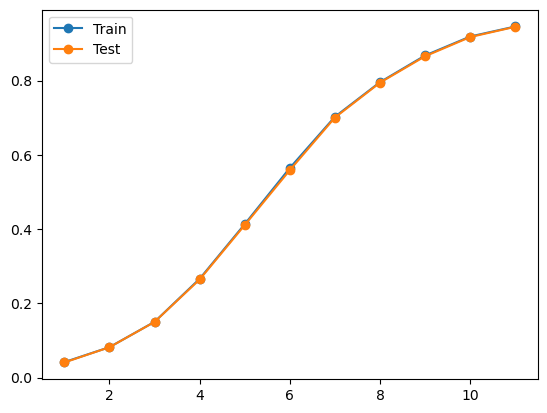

In [1185]:
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 12)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [1190]:
from pydub import AudioSegment

formats_to_convert = ['.m4a']

for (dirpath, dirnames, filenames) in os.walk("chords_test/"):
    for filename in filenames:
        if filename.endswith(tuple(formats_to_convert)):

            filepath = dirpath + '/' + filename
            (path, file_extension) = os.path.splitext(filepath)
            file_extension_final = file_extension.replace('.', '')
            try:
                track = AudioSegment.from_file(filepath,
                        file_extension_final)
                wav_filename = filename.replace(file_extension_final, 'wav')
                wav_path = dirpath + '/' + wav_filename
                print('CONVERTING: ' + str(filepath))
                file_handle = track.export(wav_path, format='wav')
                os.remove(filepath)
            except:
                print("ERROR CONVERTING " + str(filepath))

CONVERTING: chords_test/Gn_minor/G minor 4.m4a
CONVERTING: chords_test/Gn_minor/G minor 5.m4a
CONVERTING: chords_test/Bf_minor/B Flat Minor 4.m4a
CONVERTING: chords_test/Bf_minor/B Flat Minor 3.m4a
CONVERTING: chords_test/En_minor/E minor 3.m4a
CONVERTING: chords_test/En_minor/E minor 4.m4a
CONVERTING: chords_test/Fn_minor/F minor 4.m4a
CONVERTING: chords_test/Fn_minor/F minor 3.m4a
CONVERTING: chords_test/Af_minor/A Flat Minor 4.m4a
CONVERTING: chords_test/Af_minor/A Flat Minor 3.m4a
CONVERTING: chords_test/Bn_minor/B minor 4.m4a
CONVERTING: chords_test/Bn_minor/B minor 3.m4a


In [1196]:
chroma_all = []
mfcc_all = [] 

test_dir = './chords_test/'
test_files = ['D major 4.m4a',
              'D major 4.m4a',
              'C major 4.m4a',
              'A major 4.m4a',
              'D major 3.m4a',
              'D flat aug.m4a']

test_files = glob.glob('./chords_test/**/*.wav', recursive=True)

le_name_mapping = dict(zip(labelencoder.transform(labelencoder.classes_), labelencoder.classes_,))
print(le_name_mapping)

for test_file in test_files:
    mfcc_all = []
    chroma_all = []
    
    df_feat = pd.DataFrame()
    signal, sr = librosa.load(test_file)

    # generate the chroma
    S = np.abs(librosa.stft(signal))
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    chroma_avg = np.average(chroma, axis=1)
    chroma_all.append(chroma_avg)
    df_chroma = pd.DataFrame(chroma_all, columns=chroma_cols)
    # df_feat = df_chroma

    # generate the MFCC
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    mfcc_avg = np.average(mfcc, axis=1)
    mfcc_all.append(mfcc_avg)
    df_mfcc = pd.DataFrame(mfcc_all, columns=mfcc_cols)
    df_mfcc[mfcc_cols] = scaler.transform(df_mfcc[mfcc_cols])
    # df_feat = df_mfcc

    df_feat = pd.concat([df_chroma, df_mfcc], axis=1)
    y_pred = xgb_model.predict(df_feat)

    print(f'The test chord is {test_file[:-4]}. Predicted: {le_name_mapping[y_pred[0]]}')

{0: 'Af_a', 1: 'Af_d', 2: 'Af_j', 3: 'Af_n', 4: 'An_a', 5: 'An_d', 6: 'An_j', 7: 'An_n', 8: 'Bf_a', 9: 'Bf_d', 10: 'Bf_j', 11: 'Bf_n', 12: 'Bn_a', 13: 'Bn_d', 14: 'Bn_j', 15: 'Bn_n', 16: 'Cn_a', 17: 'Cn_d', 18: 'Cn_j', 19: 'Cn_n', 20: 'Df_a', 21: 'Df_d', 22: 'Df_j', 23: 'Df_n', 24: 'Dn_a', 25: 'Dn_d', 26: 'Dn_j', 27: 'Dn_n', 28: 'Ef_a', 29: 'Ef_d', 30: 'Ef_j', 31: 'Ef_n', 32: 'En_a', 33: 'En_d', 34: 'En_j', 35: 'En_n', 36: 'Fn_a', 37: 'Fn_d', 38: 'Fn_j', 39: 'Fn_n', 40: 'Gf_a', 41: 'Gf_d', 42: 'Gf_j', 43: 'Gf_n', 44: 'Gn_a', 45: 'Gn_d', 46: 'Gn_j', 47: 'Gn_n'}
The test chord is ./chords_test/Gn_minor/G minor 5. Predicted: En_d
The test chord is ./chords_test/Gn_minor/G minor 4. Predicted: Gn_n
The test chord is ./chords_test/Fn_major/F major 4 noise. Predicted: Df_a
The test chord is ./chords_test/Fn_major/F major 4 noise low. Predicted: Df_a
The test chord is ./chords_test/Fn_major/F major 3. Predicted: Df_a
The test chord is ./chords_test/Df_aug/D flat aug. Predicted: Df_a
The test c

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def create_mfcc(file_path):
    n_mfcc=128
    
    # create column names based on number of MFCC
    mfcc_cols = ["mfcc_" + str(i) for i in range(n_mfcc)]
    
    # import the audio file
    signal, sr = librosa.load(file_path)
    
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    mfcc = librosa.amplitude_to_db(mfcc, ref=np.max)
    mfcc_avg = np.average(mfcc, axis=1)
    
    df = pd.DataFrame(mfcc_avg, columns=mfcc_cols)
    
    return df

In [ ]:
numeric_transform = Pipeline([('scaling', StandardScaler())])

In [ ]:
preprocessing = ColumnTransformer([ ('numeric', numeric_transform, mfcc_cols)])

In [ ]:
create_cols = FunctionTransformer(create_mfcc, kw_args={'file_path' : audio_file})

In [ ]:
# Pipeline Steps - Most Important
pipeline = Pipeline(steps=[('create-mfcc', create_mfcc),
                           ('preprocessing', preprocessing),
                           ('features', feature_union),
                           ('classifier', RidgeClassifier())])

#### Random Forest

In [ ]:
### random forest

from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators' : np.arange(50 ,100, 25),
              'max_features' : np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

rfc_model = RSCV(rfc(class_weight='balanced'), param_grid, n_iter = 15).fit(X_train, y_train)
rfc_model = rfc_model.best_estimator_

#RandomForestClassifier

In [ ]:
y_rfc = rfc_model.predict(X_test)
y_rfc_proba = rfc_model.predict_proba(X_test)
print("Parameters: ",rfc.score)
print("Accuracy \t{:.3f}".format(metrics.accuracy_score(y_test, y_rfc)))
print('Recall \t\t{:.3f}'.format(metrics.recall_score(y_test, y_rfc, average='weighted')))
print('Precision \t{:.3f}'.format(metrics.precision_score(y_test, y_rfc, average='weighted')))
print('F1 Score \t{:.3f}'.format(metrics.f1_score(y_test, y_rfc, average='weighted')))
print('AUC Score \t{:.3f} '.format(metrics.roc_auc_score(y_test, y_rfc_proba, multi_class='ovo')))

Parameters:  <function ClassifierMixin.score at 0x12daf09d0>
Accuracy 	1.000
Recall 		1.000
Precision 	1.000
F1 Score 	1.000
AUC Score 	1.000 


In [ ]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate

_cv =  5
_scoring = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(estimator=xgb_model,
                       X=X_train,
                       y=y_train,
                       cv=_cv,
                       scoring=_scoring,
                       return_train_score=True)

print(r"Training Accuracy scores: {results['train_accuracy']}")
      # "Mean Training Accuracy": results['train_accuracy'].mean()*100,
      # "Training Precision scores": results['train_precision'],
      # "Mean Training Precision": results['train_precision'].mean(),
      # "Training Recall scores": results['train_recall'],
      # "Mean Training Recall": results['train_recall'].mean(),
      # "Training F1 scores": results['train_f1'],
      # "Mean Training F1 Score": results['train_f1'].mean(),
      # "Validation Accuracy scores": results['test_accuracy'],
      # "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
      # "Validation Precision scores": results['test_precision'],
      # "Mean Validation Precision": results['test_precision'].mean(),
      # "Validation Recall scores": results['test_recall'],
      # "Mean Validation Recall": results['test_recall'].mean(),
      # "Validation F1 scores": results['test_f1'],
      # "Mean Validation F1 Score": results['test_f1'].mean()
      # }

Training Accuracy scores: {results['train_accuracy']}


In [ ]:
y_pred = rfc_model.predict(df_chroma)
y_pred

array([3])

#### Confusion Matrix

In [222]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # C = confusion_matrix(y_test, preds)
# # plt.figure(figsize=(10, 8))
# # sns.heatmap(C, xticklabels=df_chroma, yticklabels=df_chroma, 
# #             annot=True, fmt='g')
# # plt.xlabel('Prediction')
# # plt.ylabel('Label')

# # disp.plot()
# # plt.show()


# # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df_chroma.classes_)
# # disp.plot()
# # plt.show()


## Feature Engineering

1. Spectral features: The frequency spectrum of the chord can be analyzed to extract information such as the power in different frequency bands, the harmonic peaks, and the spectral centroid.

2. Timbre features: Timbre is the quality of a sound that allows us to differentiate between different instruments or sounds that have the same pitch and loudness. Features such as MFCCs, Chroma and Tonnetz are commonly used to describe the timbre of the chord.

3. Pitch features: Pitch is the perceived fundamental frequency of a sound. Pitch information such as fundamental frequency, and harmonic peaks can be used to extract the notes that compose the chord.

### Fundamental Frequency and Harmonics 

Harmonics are the overtones of a sound, they are the additional frequencies that are present in a sound along with the fundamental frequency. In the case of a piano chord, harmonics are the additional notes that are present in the chord along with the fundamental notes.

In a piano chord, each note is composed of multiple harmonics, these harmonics are integer multiples of the fundamental frequency. The fundamental frequency is the lowest frequency present in the chord and is often referred to as the first harmonic. The next highest frequency present in the chord is known as the second harmonic and is twice the frequency of the fundamental, and so on.

For example, if the fundamental frequency of a chord is C4 (261.63 Hz), the second harmonic will be at 523.25 Hz (2261.63), the third harmonic will be at 784.88 (3261.63) and so on.

When all the harmonics of the fundamental frequency are present, the sound is perceived as being rich and complex. Each harmonic adds its own unique character to the overall sound of the chord.

It's important to note that each piano key produce a different set of harmonics, so the harmonics of a chord will depend on the notes present in the chord.

In [ ]:
# h: height threshold. I defined as %5 of max value
h = signal_f_onesided.max()*5/100
peaks, _ = find_peaks(signal_f_onesided, distance=10, height = h)

freq_50_index = np.abs(y_freq - 50).argmin() # finding index for 50 Hz
peaks = peaks[peaks>freq_50_index] # filtering out peaks less than 50 Hz
harmonics = y_freq[peaks]
print("Harmonics: {}".format(np.round(harmonics)))

# Plot
i = peaks.max() + 100
plt.plot(y_freq[:i], signal_f_onesided[:i])
plt.plot(y_freq[peaks], signal_f_onesided[peaks], "x")
plt.xlabel('Frequency [Hz]')
plt.show()

In [ ]:
# I would like to create a method so that I can use in the next section
# The method will read sound file, apply Fourier, find peak frequencies and return
# Input: path of the sound file
# Output: Frequency peaks
# print_peaks = true to plot peaks

def find_harmonics(path, print_peaks=False):
    fs, X = wavfile.read(path)
    N = len(X)
    X_F = fft(X)
    X_F_onesided = 2.0/N * np.abs(X_F[0:N//2])
    freqs = fftfreq(N, 1/fs)[:N//2]
    freqs_50_index = np.abs(freqs - 50).argmin()
    
    h = X_F_onesided.max()*5/100
    peaks, _ = find_peaks(X_F_onesided, distance=10, height = h)
    peaks = peaks[peaks>freqs_50_index]
    harmonics = np.round(freqs[peaks],2)
    
    if print_peaks:
        i = peaks.max() + 100
        plt.plot(freqs[:i], X_F_onesided[:i])
        plt.plot(freqs[peaks], X_F_onesided[peaks], "x")
        plt.xlabel('Frequency [Hz]')
        plt.show()
    return harmonics

----

-----

## Other Features
- chromagram (chroma stft)

- zero crossing rate (measure noisiness)
- RMS (root mean square) (indicate loudness)
- signal processing (time-frequency transformation)
- Fourier Transform (FFT or FT or short-time Fourier transform (stft)?)
- spectra (magnitude spectrum / power spectrum) --> spectral bandwidth????
- spectral features (spectral centroid, spectral runoff)
- MPEG7 Features (low level, high level descriptors)
- Mel spectrogram (MFCCs) (good timbre feature)





In [263]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(signal, sr=sr)[0]
print(spectral_centroids.shape)


(174,)


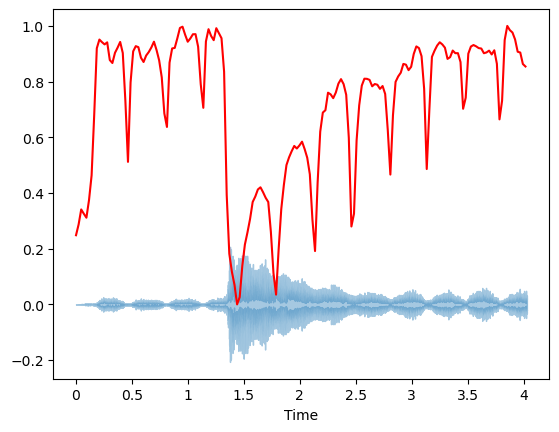

In [262]:
# spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [264]:
## spectral rolloff

plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

NameError: name 'x' is not defined

<Figure size 2000x500 with 0 Axes>

## 1D CNN
In 1D CNN, kernel moves in 1 direction. Input and output data of 1D CNN is 2 dimensional. Mostly used on Time-Series data.



https://towardsdatascience.com/cnns-for-audio-classification-6244954665ab
- extract features which look like images and shape them in a way in order to feed them into a CNN
Note:
- The CNN is expecting an image: a grayscale image (1 channel), a color image with three channels: red, green and blue (RGB)
- need to make your audio features look like an image:
1. Choose either 1D for a grayscale image (one feature) or 3D for a color image (to represent multiple features).
2. Scale and pad the audio features so that every “channel” is the same size.


https://12ft.io/proxy?q=https%3A%2F%2Fmedium.com%2Fx8-the-ai-community%2Faudio-classification-using-cnn-coding-example-f9cbd272269e



https://deepai.org/publication/end-to-end-environmental-sound-classification-using-a-1d-convolutional-neural-network
End-to-End Environmental Sound Classification using a 1D Convolutional Neural Network (paper)


In [225]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense

In [266]:
# def create_model(input_shape):
#     # Input layer
#     input_tensor = Input(shape=input_shape)
    
#     # Convolutional layer
#     x = Conv1D(32, kernel_size=3, activation='relu')(input_tensor)
    
#     # Max pooling layer
#     x = MaxPooling1D(pool_size=2)(x)
    
#     # Flatten layer
#     x = Flatten()(x)
    
#     # Output layer
#     output_tensor = Dense(1, activation='sigmoid')(x)
    
#     # Create the model
#     model = Model(input_tensor, output_tensor)
    
#     return model

# def load_audio(filepath):
#     # Load the audio file
#     y, sr = librosa.load(filepath)
    
#     # Extract features
#     mfccs = librosa.feature.mfcc(y=y, sr=sr)
    
#     return mfccs

# # create the model
# input_shape = (20, 13)
# model = create_model(input_shape)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # load audio files
# directory = '/path/to/directory'
# x_

In [268]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'trainX' is not defined

## LSTMs

https://heartbeat.comet.ml/using-a-keras-long-shortterm-memory-lstm-model-to-predict-stock-prices-a08c9f69aa74

1. Sequential for initializing the neural network
2. Dense for adding a densely connected neural network layer
3. LSTM for adding the Long Short-Term Memory layer
4. Dropout for adding dropout layers that prevent overfitting

In [174]:
# Building the LSTM

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

https://heartbeat.comet.ml/using-a-keras-long-shortterm-memory-lstm-model-to-predict-stock-prices-a08c9f69aa74

We add the LSTM layer and later add a few `Dropout` layers to prevent overfitting. We add the LSTM layer with the following arguments:

1. `50 units` which is the dimensionality of the output space
2. `return_sequences=True` which determines whether to return the last output in the output sequence, or the full sequence
3. `input_shape` as the shape of our training set.

When defining the `Dropout` layers, we specify 0.2, meaning that 20% of the layers will be dropped. Thereafter, we add the `Dense` layer that specifies the output of 1 unit. 

After this, we compile our model using the popular Adam optimizer and set the loss as the `mean_squared_error`. 

This will compute the mean of the squared errors. Next, we fit the model to run on 100 epochs with a batch size of 32. Keep in mind that, depending on the specs of your computer, this might take a few minutes to finish running.

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 100, batch_size = 32)